# Febrill Dwi


# Import Libraries

In [6]:
# !wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
# !dpkg -i google-chrome-stable_current_amd64.deb
# !apt-get install -f
# !apt-get install -y chromium-chromedriver

In [7]:
# Instal Google Chrome
!apt-get update -q
!apt-get install -y -q google-chrome-stable

# Unduh ChromeDriver yang sesuai dengan versi Google Chrome yang terinstal
!wget https://chromedriver.storage.googleapis.com/113.0.5672.63/chromedriver_linux64.zip

# Ekstrak ChromeDriver
!unzip chromedriver_linux64.zip

# Pindahkan ChromeDriver ke direktori yang sesuai dan ubah izin akses
!mv chromedriver /usr/bin/chromedriver
!chmod +x /usr/bin/chromedriver


'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


'unzip' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip install geopy

^C


In [ ]:
!apt-get update -y
!apt-get install -y google-chrome-stable
!apt-get install -y chromedriver
!pip install selenium
!pip install webdriver-manager

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


  Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl.metadata (12 kB)
Using cached webdriver_manager-4.0.2-py2.py3-none-any.whl (27 kB)


In [ ]:
!which google-chrome-stable

'which' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!pip install selenium webdriver-manager

In [ ]:
!pip install chromium
!pip install selenium
!pip install webdriver-manager
!pip install folium geopandas pandas

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from urllib.parse import urlparse, parse_qs
from sklearn.model_selection import train_test_split
import folium
import pandas as pd
from folium.plugins import HeatMap

In [2]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

#Import URL

In [ ]:
url = 'https://www.bukitvista.com/search-results?location%5B%5D=&areas%5B%5D=&bedrooms=' # get url
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}  # avoid blocking
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    print(soup.title.text)  # showing title page
else:
    print("failed to access")

Search Results - Bukit Vista


In [ ]:
# get html content
soup = BeautifulSoup(response.content, 'html') # If this line causes an error, run 'pip install html5lib' or install html5lib
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" prefix="og: https://ogp.me/ns#">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-N33B4BS');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <meta content="telephone=no" name="format-detection"/>
  <!-- Search Engine Optimization by Rank Math - https://rankmath.com/ -->
  <title>
   Search Results - Bukit Vista
  </title>
  <meta content="Go Back I'm looking for BeachfrontGuest HouseHomestayIsland lifeJungle ViewOcean viewResidentialRice paddy viewStyleViewVilla Where

# Scraping

## Vacation Rentals Page

In [ ]:
# get content
rentals = soup.find_all('div', attrs={'class': 'item-body flex-grow-1'})
len(rentals)

9

In [ ]:
for content in rentals:
    h2_element = content.find('h2')  # find h2 in page
    if h2_element:
        print(h2_element.text.strip())  # strip text
    else:
        print("Element <h2> tidak ditemukan")


Uluwatu Modern Boho Villa Near Nyang Nyang Beach
Bingin Beach Hideaway: Group Villa with Pool & BBQ
4-Bedroom Mediterranean Luxury Villa with Ubud Rooftop View
Luxurious 3-Bedroom Nusa Dua Seafront Villa w/ Private Beach
Grand Villa Retreat w/ Pool & Garden in Ungasan
Surfer’s Villa 4 Mins to Bingin & Dreamland Beach by Bukit Vista
Private Pool Villa Minutes from Bingin Surf Haven by Bukit Vista
Ungasan Exquisite Villa w/ Rooftop & Private Pool by Bukit Vista
Sun-Soaked Canggu Villa Perfect for Families


In [ ]:
# data hotel
data_rentals = []
for content in rentals:
    name = content.find('h2', attrs={'class': 'item-title'}).text
    location = content.find('address', attrs={'class': 'item-address'}).text
    bedrooms = content.find('li', attrs={'class': 'h-beds'}).text
    bathrooms = content.find('li', attrs={'class': 'h-baths'}).text
    property_type = content.find('li', attrs={'class': 'h-type'}).text
    price = content.find('li', attrs={'class': 'item-price item-price-text'}).text
    data_rentals.append(
        {
            'name': name,
            'location' : location,
            'bedrooms' : bedrooms,
            'bathrooms' : bathrooms,
            'property_type' : property_type,
            'price' : price
        }
    )
data_rentals

[{'name': '\nUluwatu Modern Boho Villa Near Nyang Nyang Beach\n',
  'location': 'Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel., Kabupaten Badung, Bali 80361',
  'bedrooms': 'Beds: 2',
  'bathrooms': 'Baths: 2',
  'property_type': 'Amazing pool, Island life, Pool view, Surfing, Tropical, Villa',
  'price': '$258 per 2 nights'},
 {'name': '\nBingin Beach Hideaway: Group Villa with Pool & BBQ\n',
  'location': 'Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Pecatu, Kec. Kuta Sel., Kabupaten Badung, Bali 80361',
  'bedrooms': 'Beds: 3',
  'bathrooms': 'Baths: 3',
  'property_type': 'Amazing pool, Island life, Pool view, Surfing, Tropical, Villa',
  'price': 'Starting from USD 161 per night'},
 {'name': '\n4-Bedroom Mediterranean Luxury Villa with Ubud Rooftop View\n',
  'location': 'Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gianyar, Bali 80571',
  'bedrooms': 'Beds: 4',
  'bathrooms': 'Baths: 4',
  'property_type': 'Amazing pool, Amazing View, Jungle View, Pool view, Tropical, Villa',
  'pric

In [ ]:
# list to store all rentals data
data_rentals = []

# loop to retrieve data from multiple pages
for page in range(1, 7):  # adjust the number of pages on the website
    # specify URL by page
    if page == 1:
        url = "https://www.bukitvista.com/search-results"
    else:
        url = f"https://www.bukitvista.com/search-results/page/{page}"

    # get web page
    headers = {'User-Agent': 'Mozilla/5.0'}  # avoid blocking
    response = requests.get(url, headers=headers)

    # parse pages with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # find all element
    rentals = soup.find_all('div', class_='item-body flex-grow-1')  # adjust with main elements

    for content in rentals:
        try:
            name = content.find('h2', class_='item-title').text.strip()
            location = content.find('address', class_='item-address').text.strip()
            bedrooms = content.find('li', class_='h-beds').text.strip() if content.find('li', class_='h-beds') else 'N/A'
            bathrooms = content.find('li', class_='h-baths').text.strip() if content.find('li', class_='h-baths') else 'N/A'
            property_type = content.find('li', class_='h-type').text.strip() if content.find('li', class_='h-type') else 'N/A'
            price = content.find('ul', class_='item-price-wrap hide-on-list').text.strip() if content.find('ul', class_='item-price-wrap hide-on-list') else 'N/A'
            agency = content.find('div', class_='item-author').text.strip() if content.find('div', class_='item-author') else 'N/A'

            # ensure the URL exists and is retrieved correctly
            url_element = content.find('a', attrs={'target': '_self'})
            url = url_element['href'] if url_element and 'href' in url_element.attrs else 'N/A'

            data_rentals.append(
                {
                    'name': name,
                    'location': location,
                    'bedrooms': bedrooms,
                    'bathrooms': bathrooms,
                    'property_type': property_type,
                    'price_range': price,
                    'url': url,
                    'agency': agency
                }
            )
        except AttributeError:
            continue  # skip if element not found

# print to dataframe
df_rentals = pd.DataFrame(data_rentals)
pd.set_option('display.max_columns', None)
df_rentals.head()

,name,location,bedrooms,bathrooms,property_type,price_range,url,agency
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",Beds: 2,Baths: 2,"Amazing pool, Island life, Pool view, Surfing,...",$258 per 2 nights,https://www.bukitvista.com/property/uluwatu-mo...,Agus Weda
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Beds: 3,Baths: 3,"Amazing pool, Island life, Pool view, Surfing,...",Starting from USD 161 per night,https://www.bukitvista.com/property/bingin-bea...,Bukit Vista
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Beds: 4,Baths: 4,"Amazing pool, Amazing View, Jungle View, Pool ...",USD 202 / Night,https://www.bukitvista.com/property/mediterran...,Bukit Vista
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,,Beds: 3,Baths: 4,"Beachfront, Villa",Starting from USD 715 per 2 nights,https://www.bukitvista.com/property/nusa-dua-s...,Konang
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Beds: 2,Baths: 2,"Amazing pool, Golfing, Pool view, Villa",Starting from USD 84 per night,https://www.bukitvista.com/property/grand-vill...,Bukit Vista


Data Description
- name : Property name
- location: Property location
- bedrooms : Bedrooms total
- bathrooms : Full bathroom (Usually consists of a toilet, sink, and shower or bathtub) / Half bathroom (usually only consists of a toilet and sink, without a shower or bathtub)
- property_type : Guest house / Villa
- price_range : price range

### Get Google Maps Location (testing)

In [ ]:
maps_link = soup.find('a', class_='btn btn-primary btn-slim', href=lambda x: 'maps.google.com' in x)
maps_url = maps_link['href'] if maps_link else 'N/A'
maps_url

'N/A'

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="geo_scraper")
location = geolocator.geocode("Pecatu, Kuta Selatan, Badung, Bali, Nusa Tenggara, Indonesia")

if location:
    print(f"Latitude: {location.latitude}, Longitude: {location.longitude}")
else:
    print("coordinate not found.")


Latitude: -8.8266671, Longitude: 115.1149608


### Vacation Rentals Detailed Page

In [ ]:
%%time
# initialize geolocator
geolocator = Nominatim(user_agent="geo_scraper")

# list to store all details data
detailed_data_rentals = []

# scrape the detail page for each rental
for rental in data_rentals:
    detail_url = rental['url']

    # request the detail page
    headers = {'User-Agent': 'Mozilla/5.0'}  # avoid blocking
    response = requests.get(detail_url, headers=headers)

    # parse the page with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    try:
        # extract additional details
        detailed_address = soup.find('li', class_='detail-address').find('span').text.strip() if soup.find('li', class_='detail-address') else None
        city = soup.find('li', class_='detail-city').find('span').text.strip() if soup.find('li', class_='detail-city') else None
        state = soup.find('li', class_='detail-state').find('span').text.strip() if soup.find('li', class_='detail-state') else None
        area = soup.find('li', class_='detail-area').find('span').text.strip() if soup.find('li', class_='detail-area') else None
        country = soup.find('li', class_='detail-country').find('span').text.strip() if soup.find('li', class_='detail-country') else None
        zip_code = soup.find('li', class_='detail-zip').find('span').text.strip() if soup.find('li', class_='detail-zip') else None
        number_of_guests = soup.find('li', class_='guest-number').find('span').text.strip() if soup.find('li', class_='guest-number') else None
        property_status = soup.find('li', class_='prop_status').find('span').text.strip() if soup.find('li', class_='prop_status') else None

        # get airbnb link
        airbnb_link = soup.find('a', class_=['wp-block-button__link has-vivid-red-background-color has-background wp-element-button',
                                'wp-block-button__link has-white-color has-vivid-red-background-color has-text-color has-background wp-element-button',
                                'wp-block-button__link has-vivid-red-background-color has-background has-text-align-left wp-element-button',
                                'wp-block-button__link has-vivid-red-background-color has-background',
                                'wp-block-button__link has-white-color has-vivid-red-background-color has-text-color has-background'
                                             ])
        airbnb_url = airbnb_link['href'] if airbnb_link and airbnb_link.has_attr('href') else None

        # get google maps link
        maps_link = soup.find('a', class_='btn btn-primary btn-slim', href=lambda x: 'maps.google.com' in x)
        maps_url = maps_link['href'] if maps_link else None

        #get coordinate if maps maps_url is found
        latitude, longitude = None, None
        full_address = rental['location']

        if full_address and full_address != None:
            try:
                time.sleep(1)  # avoid rate limit
                geocode_result = geolocator.geocode(full_address, timeout=10)
                if geocode_result:
                    latitude, longitude = geocode_result.latitude, geocode_result.longitude
            except Exception as e:
                print(f"Error geocoding location '{full_address}': {e}")

        # add the additional details to the rental data
        detailed_data_rentals.append(
            {
                'name': rental['name'],
                'location': rental['location'],
                'bedrooms': rental['bedrooms'],
                'bathrooms': rental['bathrooms'],
                'property_type': rental['property_type'],
                'price_range': rental['price_range'],
                'url': rental['url'],
                'agency': agency,
                'detailed_address': detailed_address,
                'city': city,
                'state': state,
                'area': area,
                'country': country,
                'zip_code': zip_code,
                'number_of_guests': number_of_guests,
                'property_status': property_status,
                'maps_url': maps_url,
                'latitude': latitude,
                'longitude': longitude,
                'airbnb_url': airbnb_url
            }
        )
    except AttributeError:
        continue  # skip if any element is not found

# print to dataframe
detailed_data_rentals = pd.DataFrame(detailed_data_rentals)
detailed_data_rentals

CPU times: user 7.33 s, sys: 182 ms, total: 7.51 s
Wall time: 3min 9s


,name,location,bedrooms,bathrooms,property_type,price_range,url,agency,detailed_address,city,state,area,country,zip_code,number_of_guests,property_status,maps_url,latitude,longitude,airbnb_url
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",Beds: 2,Baths: 2,"Amazing pool, Island life, Pool view, Surfing,...",$258 per 2 nights,https://www.bukitvista.com/property/uluwatu-mo...,Bukit Vista,None,None,None,None,None,None,None,None,None,NaN,NaN,https://www.airbnb.com/rooms/1287975372353817564
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Beds: 3,Baths: 3,"Amazing pool, Island life, Pool view, Surfing,...",Starting from USD 161 per night,https://www.bukitvista.com/property/bingin-bea...,Bukit Vista,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Bali,Bali,Bingin,Indonesia,80361,6,"Bali Vacation Rental, Group Friendly Stay, Lon...",http://maps.google.com/?q=Jl.%20Pantai%20Cemon...,NaN,NaN,https://www.airbnb.com/rooms/1201807361024443576
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Beds: 4,Baths: 4,"Amazing pool, Amazing View, Jungle View, Pool ...",USD 202 / Night,https://www.bukitvista.com/property/mediterran...,Bukit Vista,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Bali,Bali,Ubud,Indonesia,80571,8,"Bali Vacation Rental, Group Friendly Stay, Ins...","http://maps.google.com/?q=Jl.%20Suweta,%20Ubud...",NaN,NaN,https://www.airbnb.com/rooms/1338046513545783704
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,,Beds: 3,Baths: 4,"Beachfront, Villa",Starting from USD 715 per 2 nights,https://www.bukitvista.com/property/nusa-dua-s...,Bukit Vista,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",Bali,Bali,Nusa Dua,Indonesia,80363,6,"Bali Vacation Rental, Top Trending",None,NaN,NaN,https://www.airbnb.com/rooms/945876?check_in=2...
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Beds: 2,Baths: 2,"Amazing pool, Golfing, Pool view, Villa",Starting from USD 84 per night,https://www.bukitvista.com/property/grand-vill...,Bukit Vista,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Bali,Bali,Balangan,Indonesia,80361,4,"Group Friendly Stay, Long Stay Trend Property,...",http://maps.google.com/?q=Jl.%20Pantai%20Balan...,NaN,NaN,https://www.airbnb.com/rooms/1229763427554175376
5,Surfer’s Villa 4 Mins to Bingin & Dreamland Be...,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg...",Beds: 2,Baths: 2.5,"Pool view, Villa",Starting from USD 118 per night,https://www.bukitvista.com/property/surfers-vi...,Bukit Vista,"Jl. Bangbang Metuug, Pecatu, Kec. Kuta Sel., K...",Bali,Bali,Pecatu,Indonesia,80361,4,"Long Stay Trend Property, New Listing, Private...","http://maps.google.com/?q=Pecatu,%20Kuta%20Sel...",-8.826667,115.114961,https://www.airbnb.com/rooms/12330187636979381...
6,Private Pool Villa Minutes from Bingin Surf Ha...,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg...",Beds: 2,Baths: 2,"Pool view, Villa",Starting from USD 165 per night,https://www.bukitvista.com/property/private-po...,Bukit Vista,"Jl. Bangbang Metuug, Pecatu, Kec. Kuta Sel., K...",Bali,Bali,Pecatu,Indonesia,80361,4,"Long Stay Trend Property, New Listing, Private...","http://maps.google.com/?q=Pecatu,%20Kuta%20Sel...",-8.826667,115.114961,https://www.airbnb.com/rooms/12330187636979381...
7,Ungasan Exquisite Villa w/ Rooftop & Private P...,"Ungasan, Kuta Selatan, Badung, Bali, Nusa Teng...",Beds: 3,Baths: 3.5,"Amazing pool, Golfing, Surfing, Tropical, Villa",Starting from USD 167 per night,https://www.bukitvista.com/property/ungasan-ex...,Bukit Vista,"Jl. Pesakapan Indah No.9, Ungasan, Kec. Kuta S...",Bali,Bali,Ungasan,Indonesia,80361,6,"Group Friendly Stay, New Listing, Private Pool...","http://maps.google.com/?q=Ungasan,%20Kuta%20Se...",-8.827432,115.156893,https://bit.ly/good-juju-wp-2
8,Sun-Soaked Canggu Villa Perfect for Families,"Tibubeneng, K

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# convert to csv and download
detailed_data_rentals.to_csv('bukit-vista-rentals.csv', index=False)
files.download('bukit-vista-rentals.csv')

In [ ]:
df_rent = pd.read_csv('https://raw.githubusercontent.com/breell/dataset/refs/heads/main/bukit-vista-rentals%20(4).csv')
pd.set_option('display.max_columns', None)
df_rent.head()

,name,location,bedrooms,bathrooms,property_type,price_range,url,agency,detailed_address,city,state,area,country,zip_code,number_of_guests,property_status,maps_url,latitude,longitude,airbnb_url
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",Beds: 2,Baths: 2,"Amazing pool, Island life, Pool view, Surfing,...",$258 per 2 nights,https://www.bukitvista.com/property/uluwatu-mo...,Bukit Vista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/1287975372353817564
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Beds: 3,Baths: 3,"Amazing pool, Island life, Pool view, Surfing,...",Starting from USD 161 per night,https://www.bukitvista.com/property/bingin-bea...,Bukit Vista,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Bali,Bali,Bingin,Indonesia,80361.0,6.0,"Bali Vacation Rental, Group Friendly Stay, Lon...",http://maps.google.com/?q=Jl.%20Pantai%20Cemon...,NaN,NaN,https://www.airbnb.com/rooms/1201807361024443576
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Beds: 4,Baths: 4,"Amazing pool, Amazing View, Jungle View, Pool ...",USD 202 / Night,https://www.bukitvista.com/property/mediterran...,Bukit Vista,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Bali,Bali,Ubud,Indonesia,80571.0,8.0,"Bali Vacation Rental, Group Friendly Stay, Ins...","http://maps.google.com/?q=Jl.%20Suweta,%20Ubud...",NaN,NaN,https://www.airbnb.com/rooms/1338046513545783704
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,NaN,Beds: 3,Baths: 4,"Beachfront, Villa",Starting from USD 715 per 2 nights,https://www.bukitvista.com/property/nusa-dua-s...,Bukit Vista,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",Bali,Bali,Nusa Dua,Indonesia,80363.0,6.0,"Bali Vacation Rental, Top Trending",NaN,NaN,NaN,https://www.airbnb.com/rooms/945876?check_in=2...
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Beds: 2,Baths: 2,"Amazing pool, Golfing, Pool view, Villa",Starting from USD 84 per night,https://www.bukitvista.com/property/grand-vill...,Bukit Vista,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Bali,Bali,Balangan,Indonesia,80361.0,4.0,"Group Friendly Stay, Long Stay Trend Property,...",http://maps.google.com/?q=Jl.%20Pantai%20Balan...,NaN,NaN,https://www.airbnb.com/rooms/1229763427554175376


## Airbnb

In [ ]:
import requests
# Check whether targeted URL allows scraping
urlbnb = 'https://www.airbnb.com/'
response = requests.get(urlbnb)
# Check if the request status was successful (status code = 200)
if response.status_code == 200:
  print("Website is accessible")
  # Check for specific headers that might indicate scraping is disallowed
  if "X-Robots-Tag" in response.headers:
    if "noindex" in response.headers["X-Robots-Tag"] or "nofollow" in response.headers["X-Robots-Tag"]:
      print("Scraping might be disallowed based on X-Robots-Tag header.")
  else:
    print("No X-Robots-Tag header found.")
else:
  print(f"Website is not accessible. Status code: {response.status_code}")

Website is accessible
No X-Robots-Tag header found.


In [ ]:
urlbnb = 'https://www.airbnb.com' # get url
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36"}  # avoid blocking
response = requests.get(urlbnb, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    print(soup.title.text)  # showing title page
else:
    print("failed to access")

Airbnb | Vacation rentals, cabins, beach houses, & more


In [ ]:
# get html content
soup = BeautifulSoup(response.content, 'html') # If this line causes an error, run 'pip install html5lib' or install html5lib
print(soup.prettify())

<!DOCTYPE html>
<html class="scrollbar-gutter" data-is-async-local-storage="true" data-is-hyperloop="true" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="en" name="locale"/>
  <meta content="notranslate" name="google"/>
  <meta content="authenticity_token" id="csrf-param-meta-tag" name="csrf-param"/>
  <meta content="" id="csrf-token-meta-tag" name="csrf-token"/>
  <meta content="" id="english-canonical-url"/>
  <meta content="on" name="twitter:widgets:csp"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="Airbnb" name="application-name"/>
  <meta content="Airbnb" name="apple-mobile-web-app-title"/>
  <meta content="#ffffff" name="theme-color"/>
  <meta content="#ffffff" name="msapplication-navbutton-color"/>
  <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
  <meta content="/?utm_source=homescreen" name="msapplication-starturl"/>
  <link crossori

In [ ]:
# get content
airbnb = soup.find_all('div', {'aria-hidden': 'true'})
len(airbnb)

3

In [ ]:
for content in airbnb:
    if content.text.strip():
        print("Rating found:", content.text.strip())
    else:
        print("No text in div.")

No text in div.
Rating found: 0
No text in div.


In [ ]:
for content in airbnb:
    print(f"Element lengkap: {content}")


Element lengkap: <div aria-hidden="true" class="i13awpw6 atm_h_1h6ojuz atm_9s_1txwivl atm_e2_f6fqlb atm_mk_h2mmj6 atm_wq_kb7nvz dir dir-ltr"><svg aria-hidden="true" focusable="false" role="presentation" style="display:block;height:16px;width:16px;fill:currentColor" viewbox="0 0 16 16" xmlns="http://www.w3.org/2000/svg"><path d="M8 .25a7.77 7.77 0 0 1 7.75 7.78 7.75 7.75 0 0 1-7.52 7.72h-.25A7.75 7.75 0 0 1 .25 8.24v-.25A7.75 7.75 0 0 1 8 .25zm1.95 8.5h-3.9c.15 2.9 1.17 5.34 1.88 5.5H8c.68 0 1.72-2.37 1.93-5.23zm4.26 0h-2.76c-.09 1.96-.53 3.78-1.18 5.08A6.26 6.26 0 0 0 14.17 9zm-9.67 0H1.8a6.26 6.26 0 0 0 3.94 5.08 12.59 12.59 0 0 1-1.16-4.7l-.03-.38zm1.2-6.58-.12.05a6.26 6.26 0 0 0-3.83 5.03h2.75c.09-1.83.48-3.54 1.06-4.81zm2.25-.42c-.7 0-1.78 2.51-1.94 5.5h3.9c-.15-2.9-1.18-5.34-1.89-5.5h-.07zm2.28.43.03.05a12.95 12.95 0 0 1 1.15 5.02h2.75a6.28 6.28 0 0 0-3.93-5.07z"></path></svg></div>
Element lengkap: <div aria-hidden="true" class="b597hka atm_c8_1np9ang atm_fr_1gtjux9 atm_g3_1j6vyh

In [ ]:
%%time
# Install selenium dan webdriver manager
!pip install selenium webdriver-manager

# Import library
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
import time

# Setup Chrome dan Selenium
def setup_driver():
    service = Service(ChromeDriverManager().install())
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')  # agar berjalan di background
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(service=service, options=options)
    return driver

# Contoh fungsi untuk mengambil rating Airbnb
def get_airbnb_rating(url):
    driver = setup_driver()
    try:
        driver.get(url)
        time.sleep(5)  # tunggu render halaman
        rating_elements = driver.find_elements(By.XPATH, "//div[@aria-hidden='true']")
        print(f"number of element found: {len(rating_elements)}")

        for element in rating_elements:
            print("Rating:", element.text.strip() or "no text")

    except Exception as e:
        print(f"Error: {e}")
    finally:
        driver.quit()

# Contoh penggunaan, ganti URL_AIRBNB dengan link Airbnb yang valid
get_airbnb_rating('https://www.airbnb.com/rooms/1201807361024443576?source_impression_id=p3_1741404387_P3bY7wr7jbrT6BU9')
print(get_airbnb_rating)


number of element found: 43
Rating: Skip to content
Rating: no text
Rating: no text
Rating: no text
Rating: Start your search
Location
Anywhere
Check in / Check out
Any week
Guests
Add guests
Airbnb your home
Bingin Beach Hideaway: Group Villa with Pool & BBQ
Share
Save
Show all photos
6 guests3 bedrooms3 beds
Rating: no text
Rating: Save
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
Rating: no text
<function get_airbnb_rating at 0x0000025E64A7D9E0>
CPU times: total: 109 ms
Wall ti

In [ ]:
%%time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Setup Selenium
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# define scrap rating
def scrape_airbnb_ratings(df):
    combined_results = []

    for url in df['airbnb_url']:
        try:
            driver.get(url)
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(5)

            wait = WebDriverWait(driver, 10)
            wait.until(EC.presence_of_element_located((By.XPATH, "//div[@aria-hidden='true'] | //span[@aria-hidden='true']")))
            # find rating element from different class element 
            element_1 = driver.find_elements(By.XPATH, "//div[@aria-hidden='true'] | //span[@aria-hidden='true']")
            element_2 = driver.find_elements(By.XPATH, "//div[contains(@class, 'r1lutz1s atm_c8_o7aogt atm_c8_l52nlx__oggzyc dir dir-ltr') and @aria-hidden='true']")
            element_3 = driver.find_elements(By.XPATH, "//span[contains(@class, 'a8jt5op atm_3f_idpfg4 atm_7h_hxbz6r atm_7i_ysn8ba atm_e2_t94yts atm_ks_zryt35 atm_l8_idpfg4 atm_mk_stnw88 atm_vv_1q9ccgz atm_vy_t94yts dir dir-ltr') and @aria-hidden='true']")
           
            # combine all element
            all_element = element_1 + element_2 + element_3
            result = None

            # get text from element
            for el in all_element:
                text = el.text.strip()
                if re.match(r'^\d\.\d{1,2}$', text): # get rating format
                    result = text
                    break

            combined_results.append(result)

        except Exception as e:
            combined_results.append(f"Error: {e}")

    driver.quit()
    df['rating'] = combined_results
    return df
df_rent = scrape_airbnb_ratings(df_rent)
df_rent

CPU times: total: 46.9 ms
Wall time: 5min 36s


,name,location,bedrooms,bathrooms,property_type,price_range,url,agency,detailed_address,city,state,area,country,zip_code,number_of_guests,property_status,maps_url,latitude,longitude,airbnb_url,rating
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",Beds: 2,Baths: 2,"Amazing pool, Island life, Pool view, Surfing,...",$258 per 2 nights,https://www.bukitvista.com/property/uluwatu-mo...,Bukit Vista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/1287975372353817564,4.42
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Beds: 3,Baths: 3,"Amazing pool, Island life, Pool view, Surfing,...",Starting from USD 161 per night,https://www.bukitvista.com/property/bingin-bea...,Bukit Vista,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Bali,Bali,Bingin,Indonesia,80361.0,6.0,"Bali Vacation Rental, Group Friendly Stay, Lon...",http://maps.google.com/?q=Jl.%20Pantai%20Cemon...,NaN,NaN,https://www.airbnb.com/rooms/1201807361024443576,5.0
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Beds: 4,Baths: 4,"Amazing pool, Amazing View, Jungle View, Pool ...",USD 202 / Night,https://www.bukitvista.com/property/mediterran...,Bukit Vista,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Bali,Bali,Ubud,Indonesia,80571.0,8.0,"Bali Vacation Rental, Group Friendly Stay, Ins...","http://maps.google.com/?q=Jl.%20Suweta,%20Ubud...",NaN,NaN,https://www.airbnb.com/rooms/1338046513545783704,5.0
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,NaN,Beds: 3,Baths: 4,"Beachfront, Villa",Starting from USD 715 per 2 nights,https://www.bukitvista.com/property/nusa-dua-s...,Bukit Vista,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",Bali,Bali,Nusa Dua,Indonesia,80363.0,6.0,"Bali Vacation Rental, Top Trending",NaN,NaN,NaN,https://www.airbnb.com/rooms/945876?check_in=2...,4.84
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Beds: 2,Baths: 2,"Amazing pool, Golfing, Pool view, Villa",Starting from USD 84 per night,https://www.bukitvista.com/property/grand-vill...,Bukit Vista,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Bali,Bali,Balangan,Indonesia,80361.0,4.0,"Group Friendly Stay, Long Stay Trend Property,...",http://maps.google.com/?q=Jl.%20Pantai%20Balan...,NaN,NaN,https://www.airbnb.com/rooms/1229763427554175376,4.76
5,Surfer’s Villa 4 Mins to Bingin & Dreamland Be...,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg...",Beds: 2,Baths: 2.5,"Pool view, Villa",Starting from USD 118 per night,https://www.bukitvista.com/property/surfers-vi...,Bukit Vista,"Jl. Bangbang Metuug, Pecatu, Kec. Kuta Sel., K...",Bali,Bali,Pecatu,Indonesia,80361.0,4.0,"Long Stay Trend Property, New Listing, Private...","http://maps.google.com/?q=Pecatu,%20Kuta%20Sel...",-8.826667,115.114961,https://www.airbnb.com/rooms/12330187636979381...,4.72
6,Private Pool Villa Minutes from Bingin Surf Ha...,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg...",Beds: 2,Baths: 2,"Pool view, Villa",Starting from USD 165 per night,https://www.bukitvista.com/property/private-po...,Bukit Vista,"Jl. Bangbang Metuug, Pecatu, Kec. Kuta Sel., K...",Bali,Bali,Pecatu,Indonesia,80361.0,4.0,"Long Stay Trend Property, New Listing, Private...","http://maps.google.com/?q=Pecatu,%20Kuta%20Sel...",-8.826667,115.114961,https://www.airbnb.com/rooms/12330187636979381...,4.72
7,Ungasan Exquisite Villa w/ Rooftop & Private P...,"Ungasan, Kuta Selatan, Badung, Bali, Nusa Teng...",Beds: 3,Baths: 3.5,"Amazing pool, Golfing, Surfing, Tropical, Villa",Starting from USD 167 per night,https://www.bukitvista.com/property/ungasan-ex...,Bukit Vista,"Jl. Pesakapan Indah No.9, Ungasan, Kec. Kuta S...",Bali,Bali,Ungasan,Indonesia,80361.0,6.0,"Group Friendly Stay, New Listing, Private Pool...","http://maps.google.com/?q=Ungasan,%20Kuta%20Se...",-8.827432,115.156893,https://bit.ly/good-juju-wp-2,

In [ ]:
# export to csv
df_rent.to_csv("bukit-vista-airbnb.csv", index=False)

In [9]:
df_rent = pd.read_csv('bukit-vista-airbnb.csv')
pd.set_option('display.max_columns', None)
df_rent.head()

,name,location,bedrooms,bathrooms,property_type,price_range,url,agency,detailed_address,city,state,area,country,zip_code,number_of_guests,property_status,maps_url,latitude,longitude,airbnb_url,rating,currency,price_value,period,Amazing View,Amazing pool,Beachfront,Golfing,Guest House,Island life,Jungle View,Ocean view,Pool view,Residential,Rice paddy view,Style,Surfing,Tropical,View,Villa,property_category
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",2,2.0,"Amazing pool, Island life, Pool view, Surfing,...",$258 per 2 nights,https://www.bukitvista.com/property/uluwatu-mo...,Bukit Vista,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",Bali,Bali,Uluwatu,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/1287975372353817564,4.42,USD,258,per 2 nights,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,Villa
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",3,3.0,"Amazing pool, Island life, Pool view, Surfing,...",Starting from USD 161 per night,https://www.bukitvista.com/property/bingin-bea...,Bukit Vista,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Bali,Bali,Bingin,Indonesia,80361.0,6.0,"Bali Vacation Rental, Group Friendly Stay, Lon...",http://maps.google.com/?q=Jl.%20Pantai%20Cemon...,NaN,NaN,https://www.airbnb.com/rooms/1201807361024443576,5.0,USD,161,per night,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,Villa
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",4,4.0,"Amazing pool, Amazing View, Jungle View, Pool ...",USD 202 / Night,https://www.bukitvista.com/property/mediterran...,Bukit Vista,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Bali,Bali,Ubud,Indonesia,80571.0,8.0,"Bali Vacation Rental, Group Friendly Stay, Ins...","http://maps.google.com/?q=Jl.%20Suweta,%20Ubud...",NaN,NaN,https://www.airbnb.com/rooms/1338046513545783704,5.0,USD,202,per night,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,Villa
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",3,4.0,"Beachfront, Villa",Starting from USD 715 per 2 nights,https://www.bukitvista.com/property/nusa-dua-s...,Bukit Vista,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",Bali,Bali,Nusa Dua,Indonesia,80363.0,6.0,"Bali Vacation Rental, Top Trending",NaN,NaN,NaN,https://www.airbnb.com/rooms/945876?check_in=2...,4.84,USD,715,per 2 nights,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Villa
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",2,2.0,"Amazing pool, Golfing, Pool view, Villa",Starting from USD 84 per night,https://www.bukitvista.com/property/grand-vill...,Bukit Vista,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Bali,Bali,Balangan,Indonesia,80361.0,4.0,"Group Friendly Stay, Long Stay Trend Property,...",http://maps.google.com/?q=Jl.%20Pantai%20Balan...,NaN,NaN,https://www.airbnb.com/rooms/1229763427554175376,4.76,USD,84,per night,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,Villa


# Data Cleaning

In [10]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               51 non-null     object 
 1   location           51 non-null     object 
 2   bedrooms           51 non-null     int64  
 3   bathrooms          51 non-null     float64
 4   property_type      51 non-null     object 
 5   price_range        51 non-null     object 
 6   url                51 non-null     object 
 7   agency             51 non-null     object 
 8   detailed_address   51 non-null     object 
 9   city               51 non-null     object 
 10  state              51 non-null     object 
 11  area               51 non-null     object 
 12  country            51 non-null     object 
 13  zip_code           40 non-null     float64
 14  number_of_guests   43 non-null     float64
 15  property_status    46 non-null     object 
 16  maps_url           38 non-nu

In [11]:
df_rent.isnull().sum()

name                  0
location              0
bedrooms              0
bathrooms             0
property_type         0
price_range           0
url                   0
agency                0
detailed_address      0
city                  0
state                 0
area                  0
country               0
zip_code             11
number_of_guests      8
property_status       5
maps_url             13
latitude             40
longitude            40
airbnb_url            1
rating                0
currency              0
price_value           0
period                0
Amazing View          0
Amazing pool          0
Beachfront            0
Golfing               0
Guest House           0
Island life           0
Jungle View           0
Ocean view            0
Pool view             0
Residential           0
Rice paddy view       0
Style                 0
Surfing               0
Tropical              0
View                  0
Villa                 0
property_category     0
dtype: int64

In [12]:
print(df_rent['rating'].unique())  # check unique in data
print(df_rent['rating'].dtype)  # check data type

['4.42' '5.0' '4.84' '4.76' '4.72' '4.57' '4.82' '4.85' '4.69' '4.93'
 '4.81' '4.55'
 'Error: Message: invalid argument: missing command parameters\nStacktrace:\n\tGetHandleVerifier [0x00D5B593+24387]\n\t(No symbol) [0x00CE58F4]\n\t(No symbol) [0x00BC0753]\n\t(No symbol) [0x00C28F51]\n\t(No symbol) [0x00C28646]\n\t(No symbol) [0x00B93245]\n\t(No symbol) [0x00B9379E]\n\t(No symbol) [0x00B93C1D]\n\tGetHandleVerifier [0x0105D873+3179043]\n\tGetHandleVerifier [0x01076CE9+3282585]\n\tGetHandleVerifier [0x0107166C+3260444]\n\tGetHandleVerifier [0x00DF4320+650448]\n\t(No symbol) [0x00CEECFD]\n\t(No symbol) [0x00B92F10]\n\t(No symbol) [0x00B92ACA]\n\tGetHandleVerifier [0x010F367C+3792940]\n\tBaseThreadInitThunk [0x75D37BA9+25]\n\tRtlInitializeExceptionChain [0x77ADC2EB+107]\n\tRtlClearBits [0x77ADC26F+191]\n'
 '4.6' '4.79' '4.73' '4.78']
object


In [13]:
df_rent.at[33, 'rating'] = df_rent['rating'].mode()[0]

In [14]:
df_rent['rating'] = df_rent['rating'].astype(float)

In [15]:
# manual imputation
df_rent.at[45, 'price_range'] = 'Rp1,558,440 per night'
df_rent.at[47, 'property_type'] = 'Villa'
df_rent['country'] = df_rent['country'].fillna('Indonesia')
df_rent.at[31, 'area'] = 'Yogyakarta'
df_rent.loc[0, ['city', 'state', 'area']] = ['Bali', 'Bali', 'Uluwatu']


In [16]:
df_rent.loc[47, ['city', 'state', 'area']] = df_rent[['city', 'state', 'area']].mode().iloc[0]

In [17]:
# extract price range column
def extract_price_range(price_string):

  #pattern for regex
  currency_pattern = r'(USD|Rp|[$])'
  price_pattern = r'(\d{1,3}(?:[.,]\d{3})*(?:\.\d+)?)'
  period_pattern = r'(per night|per month|per \d+ nights|per \d+ months|/Month|night|per Month|per Malam| / Night)'

  # match currency
  currency_match = re.search(currency_pattern, price_string)
  currency = currency_match.group(0) if currency_match else None

  # match price
  price_match = re.search(price_pattern, price_string)
  price = price_match.group(0) if price_match else None

  # match period
  period_match = re.search(period_pattern, price_string)
  period = period_match.group(0) if period_match else None

  return currency, price, period

In [18]:
# split from currency & period
df_rent[['currency', 'price_value', 'period']] = df_rent['price_range'].apply(lambda x: pd.Series(extract_price_range(x)))

In [52]:
# # extract bed & bathrooms column
# df_rent['bedrooms'] = df_rent['bedrooms'].str.replace(r'[^0-9.,]','', regex=True)
# df_rent['bathrooms'] = df_rent['bathrooms'].str.replace(r'[^0-9.,]','', regex=True)

# # convert to numeric
# df_rent['bedrooms'] = pd.to_numeric(df_rent['bedrooms'], errors='coerce')
# df_rent['bathrooms'] = pd.to_numeric(df_rent['bathrooms'], errors='coerce')

In [21]:
df_rent.loc[40, ['period']] = df_rent[['period']].mode().iloc[0]

In [22]:
df_rent['period'].value_counts()

period
per night       24
per Month       16
per Malam        4
per 2 nights     3
per month        2
 / Night         1
/Month           1
Name: count, dtype: int64

In [23]:
# change period
df_rent['period'] = df_rent['period'].str.strip()

df_rent['period'] = df_rent['period'].replace('per Malam', 'per night')
df_rent['period'] = df_rent['period'].replace('per Month', 'per month')
df_rent['period'] = df_rent['period'].replace('/ Night', 'per night')
df_rent['period'] = df_rent['period'].replace('/Month', 'per month')

In [24]:
df_rent['period'].value_counts()

period
per night       29
per month       19
per 2 nights     3
Name: count, dtype: int64

In [25]:
df_rent['currency'].value_counts()

currency
USD    26
$      19
Rp      6
Name: count, dtype: int64

In [26]:
# change currency symbol
df_rent['currency'] = df_rent['currency'].replace('$', 'USD')

In [27]:
# change price_value column to numeric
df_rent['price_value'] = df_rent['price_value'].str.replace(',', '', regex=False)
df_rent['price_value'] = df_rent['price_value'].str.replace('.', '', regex=False)

# convert to numeric
df_rent['price_value'] = pd.to_numeric(df_rent['price_value'], errors='coerce')

In [28]:
df_rent.at[25, 'property_type'] = 'Villa'

In [29]:
df_rent['property_type'].value_counts()

property_type
Villa                                                                  19
Guest House                                                             7
Guest House, Ocean view                                                 4
Amazing pool, Island life, Pool view, Surfing, Tropical, Villa          2
Residential, Villa                                                      2
Pool view, Villa                                                        2
Guest House, Residential                                                2
Villa, Residential                                                      1
Residential, Style, Villa                                               1
Beachfront, Residential, Villa                                          1
Beachfront, Guest House, Residential                                    1
View, Villa                                                             1
Jungle View, Residential, Villa                                         1
Rice paddy view, Villa  

In [30]:
# fill missing values in number_of_guest
df_rent['number_of_guests'].fillna(df_rent['number_of_guests'].median(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9788\1779620288.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rent['number_of_guests'].fillna(df_rent['number_of_guests'].median(), inplace=True)


In [31]:
df_rent['number_of_guests'] = df_rent['number_of_guests'].astype(int)

In [32]:
# one hot encoding for property type
df_property_types = df_rent['property_type'].str.get_dummies(sep=', ')
df_rent = pd.concat([df_rent, df_property_types], axis=1)

In [33]:
# property type grouping based on guest house, and villa
def categorize_property_type(property_type):
    if 'Guest House' in property_type:
        return 'Guest House'
    elif 'Villa' in property_type:
        return 'Villa'
    else:
        return 'Other'
df_rent['property_category'] = df_rent['property_type'].fillna('Other').apply(categorize_property_type)

In [34]:
df_rent.at[47, 'location'] = '54H9+X7G, Jl. Sari Sekapa, Pecatu, Kec. Kuta Sel., Kabupaten Badung, Bali 80361'

In [35]:
# fill N/A in location and detailed_address
df_rent['location'].fillna(df_rent['detailed_address'], inplace=True)
df_rent['detailed_address'].fillna(df_rent['location'], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9788\3064085556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_rent['location'].fillna(df_rent['detailed_address'], inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_9788\3064085556.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 0)
df_rent

,name,location,bedrooms,bathrooms,property_type,price_range,url,agency,detailed_address,city,state,area,country,zip_code,number_of_guests,property_status,maps_url,latitude,longitude,airbnb_url,rating,currency,price_value,period,Amazing View,Amazing pool,Beachfront,Golfing,Guest House,Island life,Jungle View,Ocean view,Pool view,Residential,Rice paddy view,Style,Surfing,Tropical,View,Villa,property_category,Amazing View,Amazing pool,Beachfront,Golfing,Guest House,Island life,Jungle View,Ocean view,Pool view,Residential,Rice paddy view,Style,Surfing,Tropical,View,Villa
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",2,2.0,"Amazing pool, Island life, Pool view, Surfing,...",$258 per 2 nights,https://www.bukitvista.com/property/uluwatu-mo...,Bukit Vista,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",Bali,Bali,Uluwatu,Indonesia,NaN,4,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/1287975372353817564,4.42,USD,258,per 2 nights,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,Villa,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",3,3.0,"Amazing pool, Island life, Pool view, Surfing,...",Starting from USD 161 per night,https://www.bukitvista.com/property/bingin-bea...,Bukit Vista,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Bali,Bali,Bingin,Indonesia,80361.0,6,"Bali Vacation Rental, Group Friendly Stay, Lon...",http://maps.google.com/?q=Jl.%20Pantai%20Cemon...,NaN,NaN,https://www.airbnb.com/rooms/1201807361024443576,5.00,USD,161,per night,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,Villa,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",4,4.0,"Amazing pool, Amazing View, Jungle View, Pool ...",USD 202 / Night,https://www.bukitvista.com/property/mediterran...,Bukit Vista,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Bali,Bali,Ubud,Indonesia,80571.0,8,"Bali Vacation Rental, Group Friendly Stay, Ins...","http://maps.google.com/?q=Jl.%20Suweta,%20Ubud...",NaN,NaN,https://www.airbnb.com/rooms/1338046513545783704,5.00,USD,202,per night,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,Villa,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",3,4.0,"Beachfront, Villa",Starting from USD 715 per 2 nights,https://www.bukitvista.com/property/nusa-dua-s...,Bukit Vista,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",Bali,Bali,Nusa Dua,Indonesia,80363.0,6,"Bali Vacation Rental, Top Trending",NaN,NaN,NaN,https://www.airbnb.com/rooms/945876?check_in=2...,4.84,USD,715,per 2 nights,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,Villa,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",2,2.0,"Amazing pool, Golfing, Pool view, Villa",Starting from USD 84 per night,https://www.bukitvista.com/property/grand-vill...,Bukit Vista,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Bali,Bali,Balangan,Indonesia,80361.0,4,"Group Friendly Stay, Long Stay Trend Property,...",http://maps.google.com/?q=Jl.%20Pantai%20Balan...,NaN,NaN,https://www.airbnb.com/rooms/1229763427554175376,4.76,USD,84,per night,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,Villa,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
5,Surfer’s Villa 4 Mins to Bingin & Dreamland Be...,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg...",2,2.5,"Pool view, Villa",Starting from USD 118 per night,https://www.bukitvista.com/property/surfers-vi...,Bukit Vista,"Jl. Bangbang Metuug, Pecatu, Kec. Kuta Sel., K...",Bali,Bali,Pecatu,Indonesia,80361.0,4,"Long Stay Trend Property, New Listing, Private...","http://maps.google.com/?q=Pecatu,%20Kuta%20Sel...",-8.826667,115.114961,https://www.airbnb.com/rooms/12330187636979381...,4.72,USD,118,per night,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,Villa,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,Private Pool Villa Minutes from Bingin Surf Ha...,"Pecatu, Kuta Selatan, Badung,

In [ ]:
from geopy.geocoders import Nominatim
# fill missing value in latitude and longitude

# initialize geolocator
geolocator = Nominatim(user_agent='geogapiExercises')

# extract coordinate
def get_coordinates(address, detailed_address):
  if pd.isna(address) or address == '':
    return None, None # if address empty the return None
  try:
    location = geolocator.geocode(address, timeout=10)
    if location:
      return location.latitude, location.longitude
  except:
    pass # failed, proceed to fallback
  if detailed_address and (pd.notna(detailed_address) and detailed_address != ''):
    try:
      location = geolocator.geocode(detailed_address, timeout=10)
      if location:
        time.sleep(5)
        return location.latitude, location.longitude
    except:
      pass # failed, return none
  return None, None

# fill N/A in latitude and longitude column
mask = df_rent['latitude'].isna() | df_rent['longitude'].isna()
df_rent.loc[mask, ['latitude', 'longitude']] = df_rent.loc[mask].apply(
    lambda row: get_coordinates(row['location'], row.get('detailed_address')), axis=1).apply(pd.Series)

In [29]:
df_rent = df_rent.drop(columns=['Villa'])

In [30]:
pd.set_option('display.max_columns', None)
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               51 non-null     object 
 1   location           51 non-null     object 
 2   bedrooms           51 non-null     int64  
 3   bathrooms          51 non-null     float64
 4   property_type      51 non-null     object 
 5   price_range        51 non-null     object 
 6   url                51 non-null     object 
 7   agency             51 non-null     object 
 8   detailed_address   51 non-null     object 
 9   city               51 non-null     object 
 10  state              51 non-null     object 
 11  area               51 non-null     object 
 12  country            51 non-null     object 
 13  number_of_guests   51 non-null     int64  
 14  rating             51 non-null     float64
 15  currency           51 non-null     object 
 16  price_value        51 non-nu

In [ ]:
df_rent = df_rent.loc[:, ~df_rent.columns.str.endswith('.1')]

In [ ]:
print(df_rent.columns[df_rent.columns.duplicated()])

Index([], dtype='object')


In [41]:
# export to csv
df_rent.to_csv("bukit-vista-airbnb(2).csv", index=False)

In [34]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               51 non-null     object 
 1   location           51 non-null     object 
 2   bedrooms           51 non-null     int64  
 3   bathrooms          51 non-null     float64
 4   property_type      51 non-null     object 
 5   price_range        51 non-null     object 
 6   url                51 non-null     object 
 7   agency             51 non-null     object 
 8   detailed_address   51 non-null     object 
 9   city               51 non-null     object 
 10  state              51 non-null     object 
 11  area               51 non-null     object 
 12  country            51 non-null     object 
 13  number_of_guests   51 non-null     int64  
 14  rating             51 non-null     float64
 15  currency           51 non-null     object 
 16  price_value        51 non-nu

In [35]:
df_rent.isnull().sum()

name                 0
location             0
bedrooms             0
bathrooms            0
property_type        0
price_range          0
url                  0
agency               0
detailed_address     0
city                 0
state                0
area                 0
country              0
number_of_guests     0
rating               0
currency             0
price_value          0
period               0
Amazing View         0
Amazing pool         0
Beachfront           0
Golfing              0
Guest House          0
Island life          0
Jungle View          0
Ocean view           0
Pool view            0
Residential          0
Rice paddy view      0
Style                0
Surfing              0
Tropical             0
View                 0
property_category    0
user_id              0
dtype: int64

# Exploratory Data Analysis

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'number_of_guests'}>,
        <Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'price_value'}>],
       [<Axes: title={'center': 'Amazing View'}>,
        <Axes: title={'center': 'Amazing pool'}>,
        <Axes: title={'center': 'Beachfront'}>,
        <Axes: title={'center': 'Golfing'}>,
        <Axes: title={'center': 'Guest House'}>],
       [<Axes: title={'center': 'Island life'}>,
        <Axes: title={'center': 'Jungle View'}>,
        <Axes: title={'center': 'Ocean view'}>,
        <Axes: title={'center': 'Pool view'}>,
        <Axes: title={'center': 'Residential'}>],
       [<Axes: title={'center': 'Rice paddy view'}>,
        <Axes: title={'center': 'Style'}>,
        <Axes: title={'center': 'Surfing'}>,
        <Axes: title={'center': 'Tropical'}>,
        <Axes: title={'center': 'View'}>],
       [<Axes: title={'center': 'user_id'}>

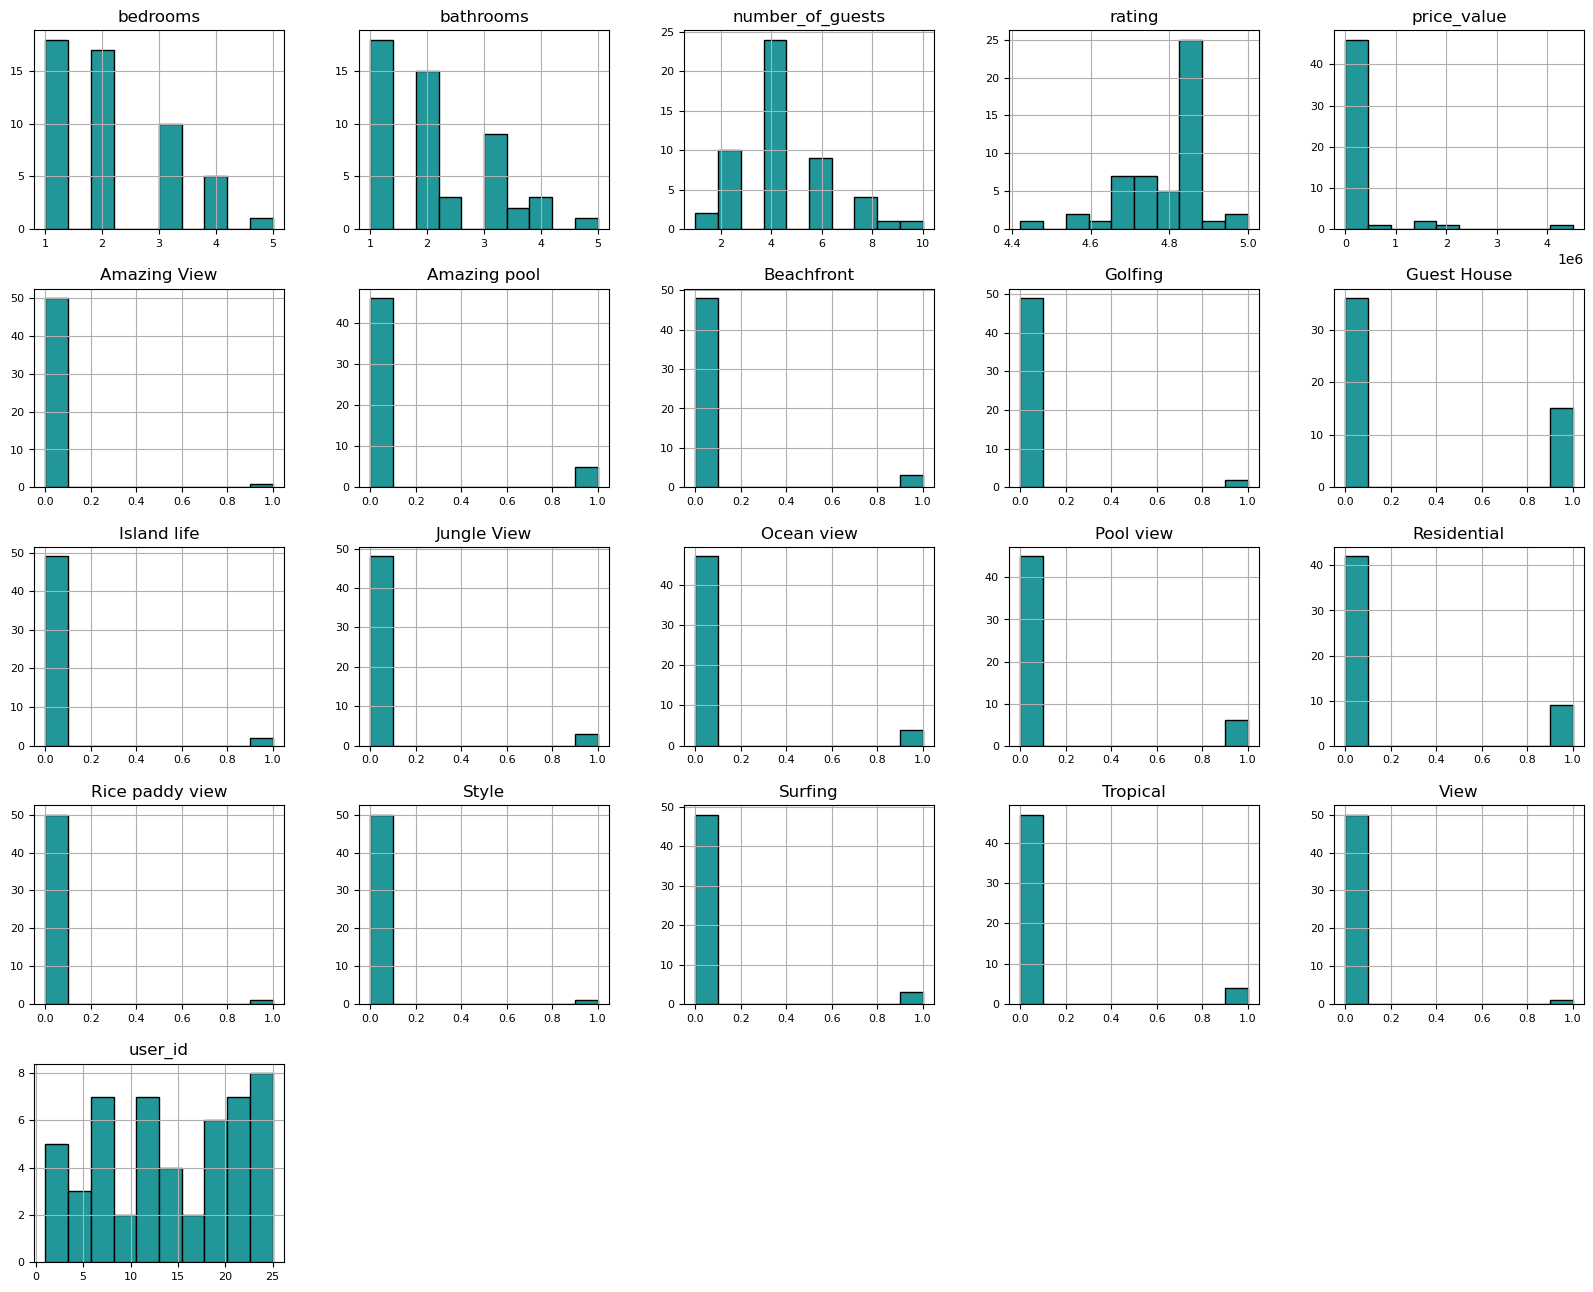

In [36]:
df_rent.hist(figsize=(20,16), bins=10, color='#229799', edgecolor='black', xlabelsize=8, ylabelsize=8)

## Property

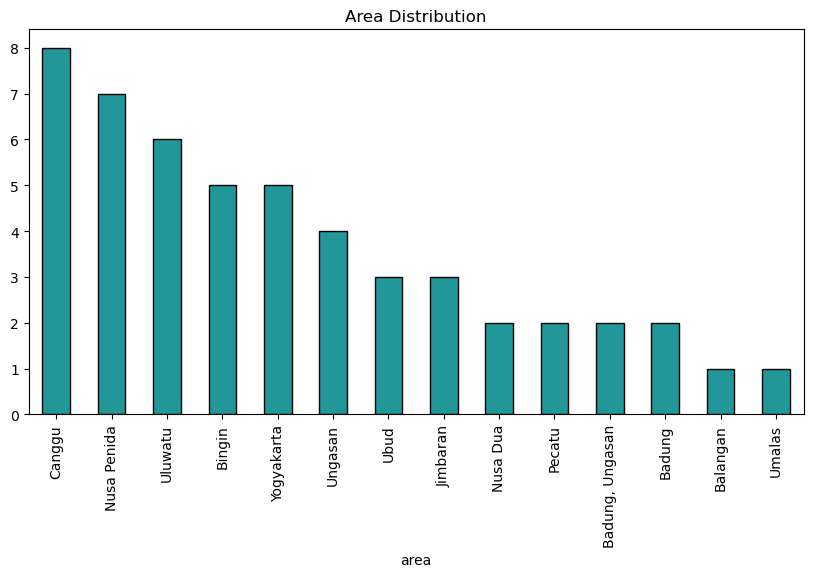

In [37]:
area_count = df_rent['area'].value_counts()
plt.figure(figsize=(10,5))
area_count.plot(kind='bar', color='#229799', edgecolor='black')

plt.title('Area Distribution')
plt.show()

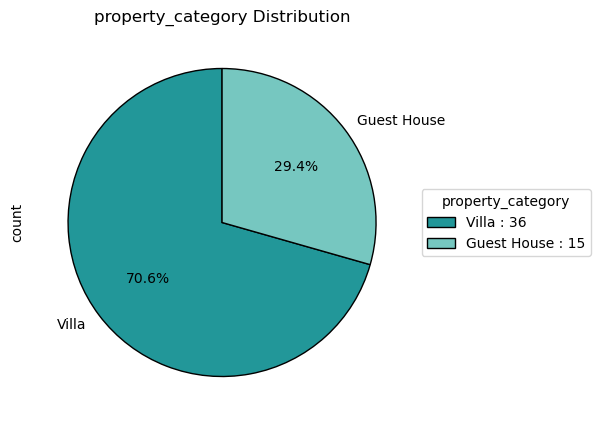

In [ ]:
area_count = df_rent['property_category'].value_counts()
plt.figure(figsize=(8,5))
area_count.plot(kind='pie',
                autopct='%1.1f%%',
                colors=['#229799', '#76c7c0','#9ed1c0', '#f5f5f5'],
                wedgeprops={'edgecolor': 'black'},
                startangle=90)

# add legend
labels = [f'{city} : {count}' for city, count in area_count.items()]
plt.legend(labels, title='property_category', loc='center left',
           bbox_to_anchor=(1, 0.5))
plt.title('property_category Distribution')
plt.show()

Text(0.5, 1.0, 'Stays Rating')

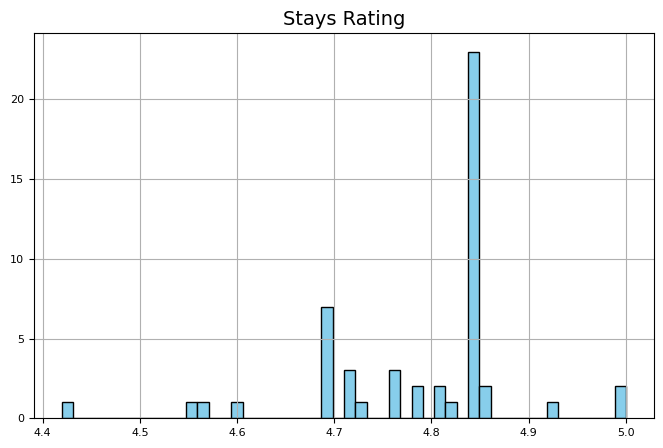

In [38]:
# histplot profit per order
df_rent['rating'].hist(figsize=(8, 5), bins=50, xlabelsize=8, color='skyblue', edgecolor='black', ylabelsize=8)
plt.title('Stays Rating', fontsize=14)

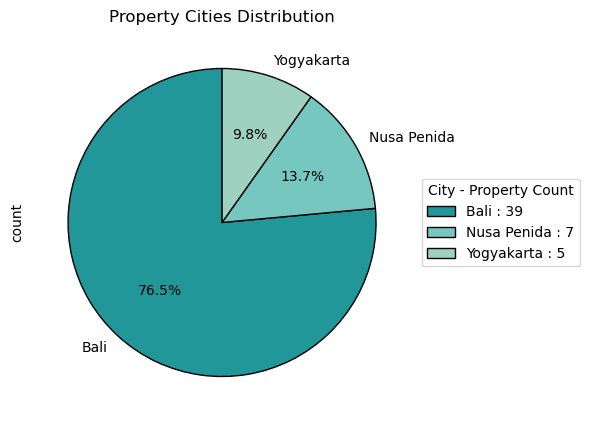

In [39]:
area_count = df_rent['city'].value_counts()
plt.figure(figsize=(8,5))
area_count.plot(kind='pie',
                autopct='%1.1f%%',
                colors=['#229799', '#76c7c0','#9ed1c0', '#f5f5f5'],
                wedgeprops={'edgecolor': 'black'},
                startangle=90)

# add legend
labels = [f'{city} : {count}' for city, count in area_count.items()]
plt.legend(labels, title='City - Property Count', loc='center left',
           bbox_to_anchor=(1, 0.5))
plt.title('Property Cities Distribution')
plt.show()

In [ ]:
# mapping property location
location_data = df_rent[['latitude', 'longitude']].dropna()
location_heatmap =  [location_data['latitude'].median(), location_data['longitude'].median()]

# mapping
heatmap = folium.Map(location=location_heatmap, zoom_start=10)
HeatMap(data=location_data.values).add_to(heatmap)
heatmap

The properties managed by Bukit Vista are located in Bali and Yogyakarta

## Financial

In [40]:
currency_count = df_rent['currency'].value_counts()
currency_count

currency
USD    45
Rp      6
Name: count, dtype: int64

In [41]:
currency_count = df_rent['period'].value_counts()
currency_count

period
per night       29
per month       19
per 2 nights     3
Name: count, dtype: int64

In [42]:
df_rent.drop(columns=['zip_code', 'property_status', 'maps_url', 'latitude', 'longitude', 'airbnb_url'], inplace=True)

In [42]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               51 non-null     object 
 1   location           51 non-null     object 
 2   bedrooms           51 non-null     int64  
 3   bathrooms          51 non-null     float64
 4   property_type      51 non-null     object 
 5   price_range        51 non-null     object 
 6   url                51 non-null     object 
 7   agency             51 non-null     object 
 8   detailed_address   51 non-null     object 
 9   city               51 non-null     object 
 10  state              51 non-null     object 
 11  area               51 non-null     object 
 12  country            51 non-null     object 
 13  number_of_guests   51 non-null     int64  
 14  rating             51 non-null     float64
 15  currency           51 non-null     object 
 16  price_value        51 non-nu

In [58]:
df_rent.duplicated().sum()

0

# Machine Learning (Singular Value Decomposition)

why SVD?
1. Reduksi Dimensi (Dimensionality Reduction)
Ketika dataset memiliki banyak fitur, SVD bisa membantu mengurangi dimensi tanpa kehilangan terlalu banyak informasi.
2. Sering digunakan dalam PCA (Principal Component Analysis) untuk mencari komponen utama yang paling berpengaruh.  
3. Sistem Rekomendasi (Recommendation Systems)
SVD digunakan dalam collaborative filtering untuk menemukan hubungan antara pengguna dan item berdasarkan pola tersembunyi dalam data.  
4. Kompresi Data (Data Compression)
SVD bisa digunakan untuk mengurangi ukuran gambar, teks, atau sinyal tanpa kehilangan terlalu banyak kualitas.

### make dummy user for colaborative filtering

In [4]:
# make asumption there is 100 user dummy
num_users = 25
# add column user_id with random value from 1 to 10
np.random.seed(42)
df_rent['user_id'] = np.random.randint(1, num_users + 1, df_rent.shape[0])

# show data
df_rent[['user_id','name','city','area','number_of_guests','rating']].head()

,user_id,name,city,area,number_of_guests,rating
0,7,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,Bali,Uluwatu,4,4.42
1,20,Bingin Beach Hideaway: Group Villa with Pool &...,Bali,Bingin,6,5.00
2,15,4-Bedroom Mediterranean Luxury Villa with Ubud...,Bali,Ubud,8,5.00
3,11,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,Bali,Nusa Dua,6,4.84
4,8,Grand Villa Retreat w/ Pool & Garden in Ungasan,Bali,Balangan,4,4.76


In [4]:
df_rent = pd.read_csv(r'D:\BOOTCAMP\INTERNSHIP - BUKIT VISTA\bukit-vista-airbnb(2).csv')
df_rent

,name,location,bedrooms,bathrooms,property_type,price_range,url,agency,detailed_address,city,...,Ocean view,Pool view,Residential,Rice paddy view,Style,Surfing,Tropical,View,property_category,user_id
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",2,2.0,"Amazing pool, Island life, Pool view, Surfing,...",$258 per 2 nights,https://www.bukitvista.com/property/uluwatu-mo...,Bukit Vista,"Jl. Batu Nunggul No.1, Pecatu, Kec. Kuta Sel.,...",Bali,...,0,1,0,0,0,1,1,0,Villa,7
1,Bingin Beach Hideaway: Group Villa with Pool &...,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",3,3.0,"Amazing pool, Island life, Pool view, Surfing,...",Starting from USD 161 per night,https://www.bukitvista.com/property/bingin-bea...,Bukit Vista,"Jl. Pantai Cemongkak Gg. Samuh Sari No.2, Peca...",Bali,...,0,1,0,0,0,1,1,0,Villa,20
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",4,4.0,"Amazing pool, Amazing View, Jungle View, Pool ...",USD 202 / Night,https://www.bukitvista.com/property/mediterran...,Bukit Vista,"Jl. Suweta, Ubud, Kecamatan Ubud, Kabupaten Gi...",Bali,...,0,1,0,0,0,0,1,0,Villa,15
3,Luxurious 3-Bedroom Nusa Dua Seafront Villa w/...,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",3,4.0,"Beachfront, Villa",Starting from USD 715 per 2 nights,https://www.bukitvista.com/property/nusa-dua-s...,Bukit Vista,"Jl. Raya Nusa Dua Selatan, Sawangan, Nusa Dua,...",Bali,...,0,0,0,0,0,0,0,0,Villa,11
4,Grand Villa Retreat w/ Pool & Garden in Ungasan,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",2,2.0,"Amazing pool, Golfing, Pool view, Villa",Starting from USD 84 per night,https://www.bukitvista.com/property/grand-vill...,Bukit Vista,"Jl. Pantai Balangan I No.9x, Ungasan, Kec. Kut...",Bali,...,0,1,0,0,0,0,0,0,Villa,8
5,Surfer’s Villa 4 Mins to Bingin & Dreamland Be...,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg...",2,2.5,"Pool view, Villa",Starting from USD 118 per night,https://www.bukitvista.com/property/surfers-vi...,Bukit Vista,"Jl. Bangbang Metuug, Pecatu, Kec. Kuta Sel., K...",Bali,...,0,1,0,0,0,0,0,0,Villa,21
6,Private Pool Villa Minutes from Bingin Surf Ha...,"Pecatu, Kuta Selatan, Badung, Bali, Nusa Tengg...",2,2.0,"Pool view, Villa",Starting from USD 165 per night,https://www.bukitvista.com/property/private-po...,Bukit Vista,"Jl. Bangbang Metuug, Pecatu, Kec. Kuta Sel., K...",Bali,...,0,1,0,0,0,0,0,0,Villa,7
7,Ungasan Exquisite Villa w/ Rooftop & Private P...,"Ungasan, Kuta Selatan, Badung, Bali, Nusa Teng...",3,3.5,"Amazing pool, Golfing, Surfing, Tropical, Villa",Starting from USD 167 per night,https://www.bukitvista.com/property/ungasan-ex...,Bukit Vista,"Jl. Pesakapan Indah No.9, Ungasan, Kec. Kuta S...",Bali,...,0,0,0,0,0,1,1,0,Villa,19
8,Sun-Soaked Canggu Villa Perfect for Families,"Tibubeneng, Kuta Utara, Badung, Bali, Nusa Ten...",2,2.0,Villa,Starting from USD 100 per night,https://www.bukitvista.com/property/sun-soaked...,Bukit Vista,"Tibubeneng, Kuta Utara, Badung, Bali",Bali,...,0,0,0,0,0,0,0,0,Villa,23
9,Sunny Exquisite Umalas Villa: 20 Minutes to Ca...,Jl. Umalas Klecung No.34,2,2.0,"Guest House, Villa",Starting from USD 108 per night,https://www.bukitvista.com/property/sunny-exqu...,Bukit Vista,Jl. Umalas Klecung No.34,Bali,...,0,0,0,0,0,0,0,0,Guest House,11


## Colaborative Filtering

In [45]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.


In [13]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# define rating scale
reader = Reader(rating_scale=(1, 5))

# create dataset surprise
data = Dataset.load_from_df(df_rent[['user_id', 'name', 'rating']], reader)

# split data to train and test set
x, y = train_test_split(data, test_size=0.2, random_state=42)

# train SVD model
model = SVD()
model.fit(x)

# predict rating in test set
predict = model.test(y)

# evaluate model
rmse = accuracy.rmse(predict) # Root Mean Squared Error
mae = accuracy.mae(predict) # Mean Absolute Error


RMSE: 0.0633
MAE:  0.0604


In [5]:
print(df_rent['user_id'].unique())

[ 7 20 15 11  8 21 19 23 24  4  3 22  2 12  6  1 25 17 10 16  5  9 18 14]


In [9]:
df_rent[df_rent['user_id'] == 7][['name', 'rating']]

,name,rating
0,Uluwatu Modern Boho Villa Near Nyang Nyang Beach,4.42
6,Private Pool Villa Minutes from Bingin Surf Ha...,4.72
43,Tranquil 3BR Villa in Jimbaran with Wi-Fi + Pool,4.84
46,Authentic Balinese Cabin near Beach | sterilized,4.85


In [11]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split as surprise_split
import pandas as pd

# define rating scale
reader = Reader(rating_scale=(1, 5))

# dataset dataset Surprise
data = Dataset.load_from_df(df_rent[['user_id', 'name', 'rating']], reader)

# split data train and test
x, y = train_test_split(data, test_size=0.2, random_state=42)

# train model SVD
model = SVD()
model.fit(x)

# predict on test set
predictions = model.test(y)

# model evaluate
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.4f}")

# === show stays recommendations for specific user === #
user_id = 7  # change it with any user

# get all stays with unique
all_hotels = df_rent['name'].unique()

# get hotels that have been rated by users
user_hotels = df_rent[df_rent['user_id'] == user_id]['name'].unique()

# get hotels that have not been rated by users
unseen_hotels = [hotel for hotel in all_hotels if hotel not in user_hotels]

# prediksi rating untuk hotel yang belum dirating user
predictions = [(hotel, model.predict(user_id, hotel).est) for hotel in unseen_hotels]

# urutkan berdasarkan rating prediksi tertinggi
recommendations = sorted(predictions, key=lambda x: x[1], reverse=True)[:5]  # Top 5 rekomendasi

# tampilkan hasil rekomendasi
print("\nHere are some stays you might want, based on what you've liked before. User ID:", user_id)
for hotel, rating in recommendations:
    print(f"Hotel: {hotel}, Predicted Rating: {rating:.2f}")


RMSE: 0.0633
RMSE: 0.0633

Here are some stays you might want, based on what you've liked before. User ID: 7
Hotel: 4BR Homey Villa in Uluwatu | Kitchen + Wifi + Pool by Bukit Vista, Predicted Rating: 4.96
Hotel: Sunny Exquisite Umalas Villa: 20 Minutes to Canggu, Predicted Rating: 4.92
Hotel: Luxury & Calm Villa with pool near Nusa Dua Beach, Predicted Rating: 4.88
Hotel: 4-Bedroom Mediterranean Luxury Villa with Ubud Rooftop View, Predicted Rating: 4.88
Hotel: Private Ungasan Hideaway Villa with Pool Oasis, Predicted Rating: 4.84


- The SVD model identifies patterns between users and items based on their ratings.
- If other users have similar preferences to user 7 and liked a certain hotel, the model will recommend that hotel to user 7—even if they’ve never seen it before.
- This approach is called collaborative filtering: it relies on community patterns rather than the content or features of the hotels themselves.

<img src='images/SVD.png' width='500'/>

Error ValueError: too many values to unpack (expected 3)  
Library Surprise (seperti SVD) hanya menerima 3 kolom utama untuk membangun model. so we will use other models

# Random Forest

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error

features = ['property_category','bedrooms','bathrooms','city','state','area',
            'number_of_guests','price_value','currency','period','Amazing View',
            'Amazing pool','Beachfront','Golfing','Guest House','Island life',
            'Jungle View','Ocean view','Pool view','Residential','Rice paddy view','Surfing'
]
target = 'rating'

# split data
x = df_rent[features]
y = df_rent[target]

# one hot encoding for categorical cols
cat_cols = x.select_dtypes(include='object').columns
x = pd.get_dummies(x, columns= cat_cols)

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# evaluate model
y_pred = rf.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 0.0590
MAE : 0.0416
MAPE: 0.87%


In [ ]:
# make copies from real data to add prediction column
df_pred = df_rent.copy()

x_all = df_pred[features]

# one hot encoding
x_all = pd.get_dummies(x_all, columns=cat_cols)

# align column
x_all = x_all.reindex(columns=x_train.columns, fill_value=0)

# predict
df_pred['predicted_rating'] = rf.predict(x_all)

# tampilkan hasil prediksi
df_pred[['name', 'city', 'area', 'rating', 'predicted_rating']].sort_values(by='predicted_rating', ascending=False).head(10)


,name,city,area,rating,predicted_rating
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,Bali,Ubud,5.00,4.9266
19,Private Ungasan Hideaway Villa with Pool Oasis,Bali,"Badung, Ungasan",4.93,4.8700
1,Bingin Beach Hideaway: Group Villa with Pool &...,Bali,Bingin,5.00,4.8579
50,Picturesque Cottage in the Heart of Ubud’s Nature,Bali,Ubud,4.84,4.8423
48,Family Holiday House w/ Private Pool in Jimbaran,Bali,Jimbaran,4.84,4.8421
43,Tranquil 3BR Villa in Jimbaran with Wi-Fi + Pool,Bali,Jimbaran,4.84,4.8389
42,Quaint & Homey Balinese Villa w/ Private Pool,Bali,Jimbaran,4.84,4.8388
24,Villa by Rice Fields in Canggu,Bali,Canggu,4.81,4.8376
28,Spacious New Tropical Villa w/ GWK View,Bali,Badung,4.84,4.8365
44,Peaceful Uluwatu Cabin w/ Unspoiled Beaches Ne...,Bali,Uluwatu,4.84,4.8356


In [88]:
top_n = 5
recommendations = df_pred.sort_values(by='predicted_rating', ascending=False).head(top_n)
print("Top Recommended Stays:")
recommendations[['name', 'city', 'area', 'predicted_rating']]


Top Recommended Stays:


,name,city,area,predicted_rating
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,Bali,Ubud,4.9266
19,Private Ungasan Hideaway Villa with Pool Oasis,Bali,"Badung, Ungasan",4.8700
1,Bingin Beach Hideaway: Group Villa with Pool &...,Bali,Bingin,4.8579
50,Picturesque Cottage in the Heart of Ubud’s Nature,Bali,Ubud,4.8423
48,Family Holiday House w/ Private Pool in Jimbaran,Bali,Jimbaran,4.8421


In [92]:
def recommend_rf(top_n=5, filter_city=None):
    recs = df_pred.copy()
    if filter_city:
        recs = recs[recs['city'] == filter_city]
    recs = recs.sort_values(by='predicted_rating', ascending=False).head(top_n)
    return recs[['name', 'city', 'area', 'predicted_rating']]

# show result:
recommend_rf(top_n=5, filter_city='Bali')


,name,city,area,predicted_rating
2,4-Bedroom Mediterranean Luxury Villa with Ubud...,Bali,Ubud,4.9266
19,Private Ungasan Hideaway Villa with Pool Oasis,Bali,"Badung, Ungasan",4.8700
1,Bingin Beach Hideaway: Group Villa with Pool &...,Bali,Bingin,4.8579
50,Picturesque Cottage in the Heart of Ubud’s Nature,Bali,Ubud,4.8423
48,Family Holiday House w/ Private Pool in Jimbaran,Bali,Jimbaran,4.8421


<img src='images/Random Forest.png' width='300'/>

# Combine Models
SVD -> Collaborative filtering based on user_id and name (recommendation based on user preferences)  
Random Forest -> Content based filtering, used other property features (evaluate hotel quality (rating) based on features)

In [ ]:
def hybrid_recommend(user_id, top_n=5):
    # Properti yang belum pernah dirating oleh user
    all_hotels = df_rent['name'].unique()
    rated_hotels = df_rent[df_rent['user_id'] == user_id]['name'].unique()
    unseen_hotels = [hotel for hotel in all_hotels if hotel not in rated_hotels]

    recommendations = []

    for hotel in unseen_hotels:
        prop_info = df_rent[df_rent['name'] == hotel].iloc[0]

        # Content-based prediction (Random Forest)
        content_feat = prop_info[features].to_frame().T
        content_feat = pd.get_dummies(content_feat)
        content_feat = content_feat.reindex(columns=x_train.columns, fill_value=0)
        rf_pred = rf.predict(content_feat)[0]

        # Collaborative prediction (SVD)
        svd_pred = model.predict(user_id, hotel).est

        # Combine both predictions (equal weight or custom)
        final_score = (rf_pred + svd_pred) / 2

        recommendations.append((hotel, final_score))

    # show result
    sorted_recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:top_n]

    return pd.DataFrame([
        {'name': name, 'predicted_rating': score}
        for name, score in sorted_recommendations
    ])
hybrid_recommend(7) # spesific user

,name,predicted_rating
0,Voguish Penthouse with Rooftop Pool Near Canggu,4.883155
1,Once in a Lifetime Hilltop Bungalow Experience,4.873497
2,Private Ungasan Hideaway Villa with Pool Oasis,4.871425
3,Sun-Soaked 2BR Villa w/ Pool 15-Min Ride to Beach,4.867339
4,Dreamy Haven w/ Pool | 300m from Bingin Beach,4.865800


# Collaborative Filtering (SVD) & Content-Based Model (RF)

In [159]:
# TRAINING COLLABORATIVE FILTERING MODEL (SVD)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_rent[['user_id', 'name', 'rating']], reader)
trainset, testset = surprise_split(data, test_size=0.2, random_state=42)

svd_model = SVD()
svd_model.fit(trainset)

# TRAINING CONTENT-BASED MODEL (RANDOM FOREST)
features = ['property_category','bedrooms','bathrooms','city','state','area',
            'number_of_guests','price_value','currency','period','Amazing View',
            'Amazing pool','Beachfront','Golfing','Guest House','Island life',
            'Jungle View','Ocean view','Pool view','Residential','Rice paddy view','Surfing']
target = 'rating'

x = df_rent[features]
y = df_rent[target]
x = pd.get_dummies(x)  # one-hot encoding for categorical variables

x_train, x_test, y_train, y_test = sklearn_split(x, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# HYBRID RECOMMENDATION FUNCTION
def hybrid_recommendation(user_id, top_n=5, alpha=0.5):
    # Ambil semua hotel
    all_hotels = df_rent['name'].unique()
    
    # stays that already rated by users
    rated = df_rent[df_rent['user_id'] == user_id]['name'].unique()
    
    # stays that not rated yet
    unseen = [hotel for hotel in all_hotels if hotel not in rated]
    
    hybrid_scores = []

    for hotel in unseen:
        # pred SVD
        svd_pred = svd_model.predict(user_id, hotel).est
        
        # features Data hotel for RF pred
        hotel_features = df_rent[df_rent['name'] == hotel][features]
        hotel_features_encoded = pd.get_dummies(hotel_features)
        
        # Align column
        hotel_features_encoded = hotel_features_encoded.reindex(columns=x.columns, fill_value=0)
        
        rf_pred = rf_model.predict(hotel_features_encoded)[0]
        
        # Hybrid score
        score = alpha * svd_pred + (1 - alpha) * rf_pred
        hybrid_scores.append((hotel, score, svd_pred, rf_pred))
    
    # sort by hybrid score
    sorted_scores = sorted(hybrid_scores, key=lambda x: x[1], reverse=True)[:top_n]
    
    # result
    print(f'\nTop {top_n} Hybrid Recommendations for User ID {user_id}:\n')
    for hotel, hybrid_score, svd_score, rf_score in sorted_scores:
        info = df_rent[df_rent['name'] == hotel].iloc[0]

        print(f'Hotel: {hotel}')
        print(f'City: {info['city']}, Area: {info['area']}, Guests: {info['number_of_guests']}, Price: {info['price_value']} {info['currency']}')
        print(f'Amenities: Bedrooms: {info['bedrooms']}, Bathrooms: {info['bathrooms']}')
        print(f'Other Amenities: Jungle View: {info['Jungle View']}, Surfing: {info['Surfing']}, Pool View: {info['Pool view']}, Golfing: {info['Golfing']}')
        print(f'Hybrid Score: {hybrid_score:.2f} | SVD: {svd_score:.2f} | RF: {rf_score:.2f}\n')

# result: reccomendation for user 7
hybrid_recommendation(user_id=7, top_n=5)



Top 5 Hybrid Recommendations for User ID 7:

Hotel: Villa by Rice Fields in Canggu
City: Bali, Area: Canggu, Guests: 4, Price: 2200 USD
Amenities: Bedrooms: 2, Bathrooms: 2.0
Other Amenities: Jungle View: 0, Surfing: 0, Pool View: 0, Golfing: 0
Hybrid Score: 4.88 | SVD: 4.92 | RF: 4.84

Hotel: Clean Room in Jogja Local Authentic Holiday House
City: Yogyakarta, Area: Yogyakarta, Guests: 2, Price: 410500 Rp
Amenities: Bedrooms: 1, Bathrooms: 1.0
Other Amenities: Jungle View: 0, Surfing: 0, Pool View: 0, Golfing: 0
Hybrid Score: 4.88 | SVD: 4.94 | RF: 4.82

Hotel: Sun-Soaked 2BR Villa w/ Pool 15-Min Ride to Beach
City: Bali, Area: Canggu, Guests: 4, Price: 91 USD
Amenities: Bedrooms: 2, Bathrooms: 2.0
Other Amenities: Jungle View: 0, Surfing: 0, Pool View: 0, Golfing: 0
Hybrid Score: 4.88 | SVD: 4.93 | RF: 4.82

Hotel: Prestigious Apartment w/ Mt. Merapi View
City: Yogyakarta, Area: Yogyakarta, Guests: 2, Price: 810000 Rp
Amenities: Bedrooms: 1, Bathrooms: 1.0
Other Amenities: Jungle Vie

Collaborative Filtering (SVD) & Content-Based Model (RF) (Machine Learning) :
- Memprediksi Rating hotel menggunakan 2 model yang digabungkan  
- Mempelajari pola dari fitur hotel yang disukai user, lalu memprediksi rating user terhadap hotel baru.  
- Bisa menangkap pola kompleks  
- Lebih fleksibel dan presisi  

pada dasarnya yang dilakukan oleh funsgi ini lebih kepada memprediksi rating hotel yang kemungkinan akan diberikan oleh pengguna untuk hotel yang belum mereka beri rating. Jadi lebih tepatnya adalah sistem prediksi rating berdasarkan dua pendekatan:

- Collaborative Filtering (SVD) – Memprediksi rating berdasarkan interaksi pengguna lain yang mirip dengan pengguna terpilih.
- Content-Based Filtering (Random Forest) – Memprediksi rating berdasarkan fitur-fitur hotel (seperti fasilitas, lokasi, tipe, dll) yang relevan dengan preferensi pengguna.

Setelah prediksi rating dilakukan oleh kedua model (SVD dan Random Forest), hybrid score dihitung untuk menentukan seberapa besar kemungkinan pengguna akan menyukai hotel-hotel tersebut.  
Hotel dengan skor tertinggi menjadi hotel yang diprediksi paling disukai oleh pengguna berdasarkan model yang telah dilatih.Meskipun hasil akhirnya mirip dengan sistem rekomendasi (karena menyarankan hotel berdasarkan prediksi rating), prosesnya lebih kepada prediksi rating untuk hotel yang belum dinilai oleh pengguna.
Dengan kata lain, ini adalah sistem prediksi rating yang digunakan untuk memberikan rekomendasi berdasarkan prediksi tersebut, bukan sistem rekomendasi yang langsung menggunakan kesamaan preferensi antar pengguna atau kesamaan antar item.  
Cara kerjanya:
- Untuk setiap hotel yang belum diberi rating oleh pengguna, sistem ini memprediksi rating yang mungkin diberikan oleh pengguna tersebut.
- Hybrid Score dihitung sebagai gabungan antara prediksi rating dari SVD dan Random Forest menggunakan bobot alpha (misalnya, alpha=0.5 berarti 50% SVD dan 50% RF).
- Setelah itu, sistem menampilkan hotel-hotel dengan skor tertinggi yang belum pernah diberikan rating oleh pengguna tersebut.

# Similarity-based

In [ ]:
features = ['property_category','bedrooms','bathrooms','city','state','area',
            'number_of_guests','price_value','currency','period','Amazing View',
            'Amazing pool','Beachfront','Golfing','Guest House','Island life',
            'Jungle View','Ocean view','Pool view','Residential','Rice paddy view','Surfing']

def content_based_recommendation(user_id, top_n=5):
    valid_features = [col for col in features if col in df_rent.columns]

    if not valid_features:
        print("Tidak ada kolom fitur yang cocok di df_rent.")
        return pd.DataFrame()

    # Ambil fitur unik dari tiap hotel
    hotel_features = df_rent[['name'] + valid_features].drop_duplicates(subset='name')

    # Hotel yang disukai user (rating >= 4)
    liked_hotels = df_rent[(df_rent['user_id'] == user_id) & (df_rent['rating'] >= 4)]

    if liked_hotels.empty:
        print(f"user ID {user_id} belum memberikan rating >= 4.")
        return pd.DataFrame()

    # Filter fitur hotel yang disukai
    liked_hotel_names = liked_hotels['name'].unique()
    liked_features = hotel_features[hotel_features['name'].isin(liked_hotel_names)].set_index('name')

    if liked_features.empty:
        print("Tidak ditemukan fitur dari hotel yang disukai user.")
        return pd.DataFrame()

    # One-hot encoding
    hotel_encoded = pd.get_dummies(hotel_features.set_index('name'))
    liked_encoded = pd.get_dummies(liked_features)

    # Samakan kolom
    liked_encoded = liked_encoded.reindex(columns=hotel_encoded.columns, fill_value=0)

    # Buat profil user dari rata-rata hotel yang disukai
    user_profile = liked_encoded.mean()

    # count similiarity score
    scores = hotel_encoded.dot(user_profile)

    # normalize score to percentage
    scores_percent = 100 * (scores - scores.min()) / (scores.max() - scores.min())

    # avoid recommends stays that have been rated by user
    rated_hotels = df_rent[df_rent['user_id'] == user_id]['name'].unique()
    scores_percent = scores_percent[~scores_percent.index.isin(rated_hotels)]

    # get top N
    recommendations = scores_percent.sort_values(ascending=False).head(top_n).reset_index()
    recommendations.columns = ['name', 'similarity_percent']

    print(f"\nTop {top_n} Content-Based Recommendations for User ID {user_id}:\n")
    for _, row in recommendations.iterrows():
        print(f"Hotel: {row['name']}\n Similarity Score: {row['similarity_percent']:.2f}%\n")

    return recommendations
content_based_recommendation(user_id=7, top_n=5)



Top 5 Content-Based Recommendations for User ID 7:

Hotel: Villa Santorini untuk Digital Nomads oleh Bukit Vista
 Similarity Score: 100.00%

Hotel: 3BR Javanese Traditional Relaxing Villa with Pool
 Similarity Score: 42.89%

Hotel: Bukit Vista | Heritage Joglo Villa w/ Private Pool
 Similarity Score: 38.89%

Hotel: Lovely Private Pool Villa in Strategic Location
 Similarity Score: 34.63%

Hotel: Prestigious Apartment w/ Mt. Merapi View
 Similarity Score: 18.00%



,name,similarity_percent
0,Villa Santorini untuk Digital Nomads oleh Buki...,100.0
1,3BR Javanese Traditional Relaxing Villa with Pool,42.888661
2,Bukit Vista | Heritage Joglo Villa w/ Private ...,38.888645
3,Lovely Private Pool Villa in Strategic Location,34.631739
4,Prestigious Apartment w/ Mt. Merapi View,17.999672


The hotel with 100% similarity wasn't rated by User 7, but its features perfectly match the average of the 4 hotels User 7 liked — so it's the best content-based prediction.



Similarity-based :
- Mengukur kemiripan fitur antar hotel, lalu merekomendasikan hotel yang mirip dengan yang disukai user.
- Tidak pakai model ML, hanya perhitungan matematis antar vektor fitur.
- Jelas alasan kemiripannya
